## Importando bibliotecas

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Leitura do dataset

In [11]:
olist_order_reviews = pd.read_csv('https://raw.githubusercontent.com/OtavioSotnas/AnaliseExploratoria-ADA-Santander/main/base%20de%20dados/olist_order_reviews_dataset.csv')

## Análise de comentários dos pedidos

In [12]:
olist_order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


Primeiro, criaremos nova coluna para categorizar a pontução do review como:
- True, se pontuação for boa (maior que 3);
- False, se pontuação for ruim (menor ou igual a 3).

In [13]:
# Criando nova coluna score > 3

score_gt_3 = np.array(olist_order_reviews['review_score'] > 3)
olist_order_reviews['score_gt_3'] = score_gt_3 

In [14]:
olist_order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,score_gt_3
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,True
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,True
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,True
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,True
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,True


Usaremos o recurso de word clouds para avaliar as palavras mais citadas nos comentários de avaliações boas e ruins.

In [19]:
# Removendo comentários com valores faltantes

not_null_comments = olist_order_reviews.dropna(subset=['review_comment_message'])

In [21]:
# Filtrando comentários de acordo com coluna "score maior que 3"

good_scores = not_null_comments[olist_order_reviews['score_gt_3'] == True]
bad_scores = not_null_comments[olist_order_reviews['score_gt_3'] == False]

C:\Users\taina\AppData\Local\Temp\ipykernel_11100\2699304006.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  good_scores = not_null_comments[olist_order_reviews['score_gt_3'] == True]
C:\Users\taina\AppData\Local\Temp\ipykernel_11100\2699304006.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bad_scores = not_null_comments[olist_order_reviews['score_gt_3'] == False]


Para produzirmos word clouds com maior valor informativo, podemos remover as stop words, que são palavras comumente utilizadas em um idioma que carregam pouca informação analítica, como artigos (o, a, um), conjunções (e, mas, ou), pronomes (ela, dele), etc.

In [22]:
# Importando stopwords da biblioteca nltk

import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('portuguese'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\taina\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
# Concatenando strings de comentários dos DataFrames em uma única string, para cada categoria

good_comments = good_scores['review_comment_message'].str.cat(sep=' ')
bad_comments = bad_scores['review_comment_message'].str.cat(sep=' ')

In [24]:
# Removendo stop words

good_comments_no_stop = ' '.join(word for word in good_comments.split() if word.lower() not in stop_words)
bad_comments_no_stop = ' '.join(word for word in bad_comments.split() if word.lower() not in stop_words)

In [25]:
# Importando WordCloud

from wordcloud import WordCloud 

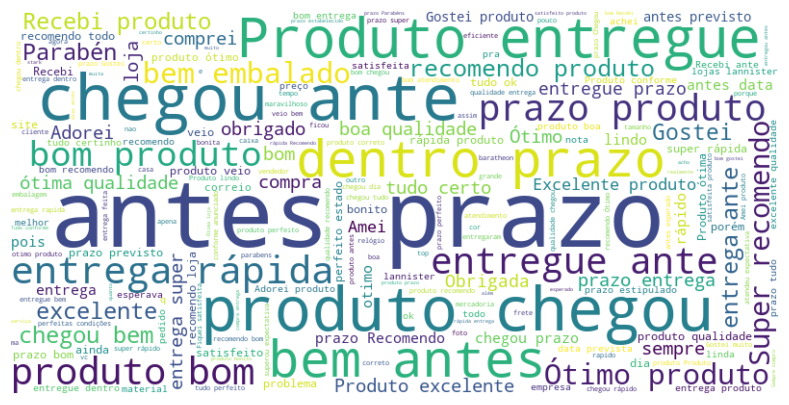

In [26]:
# Word cloud de comentários de produtos com boa avaliação

wordcloud_good = WordCloud(width=800, height=400, background_color='white').generate(good_comments_no_stop)

plt.figure(figsize=(15, 5))
plt.imshow(wordcloud_good, interpolation='bilinear')
plt.axis('off')
plt.show()

Percebe-se que muitas das palavras mais utilizadas nos comentários de boas avaliações faz referência à entrega satisfatória (ex. prazo, antes, entregue, chegou, recebi, rápido) e à qualidade do produto (ex. excelente, ótima, bom, qualidade, adorei, recomendo).

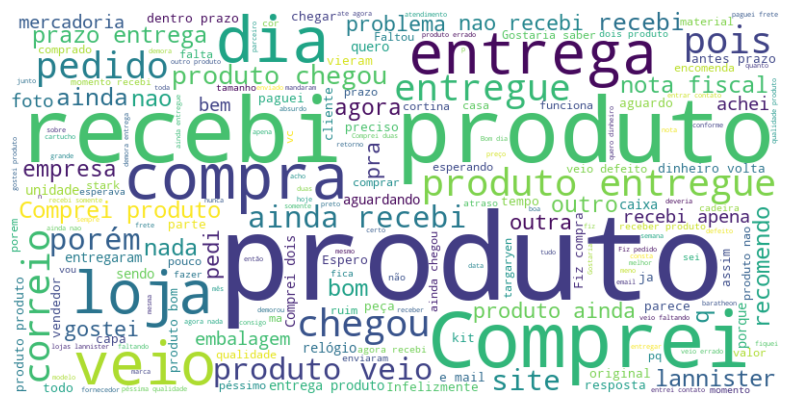

In [27]:
# Word cloud de comentários de produtos com avaliação ruim

wordcloud_bad = WordCloud(width=800, height=400, background_color='white').generate(bad_comments_no_stop)

plt.figure(figsize=(15, 5))
plt.imshow(wordcloud_bad, interpolation='bilinear')
plt.axis('off')
plt.show()

De forma similar, muitas das palavras mais frequentes dos comentários negativos referencia a entrega (ex. entregue, recebi, prazo, chegou, correio, atraso, veio errado), mas ainda temos palavras que revelam possíveis problemas relacionados ao pagamento (ex. nota fiscal, preço, compra, paguei), à qualidade do produto (ex. defeito, faltou, qualidade), ou reclamações gerais (ex. não veio, nada, aguardando, péssimo, ruim, problema).

## Análise reviews em diferentes categorias de produtos

Buscaremos analisar a distribuição de notas boas e ruins nas categorias com maior quantidade de produtos. Para isso, precisamos de informações presentes nos datasets:

- olist_order_items: order_id e product_id;
- olist_products: product_id e product_category_name;
- olist_order_reviews: order_id e score_gt_3.

Uniremos esses datasets através de um outer merge.

In [28]:
olist_order_items = pd.read_csv('https://raw.githubusercontent.com/OtavioSotnas/AnaliseExploratoria-ADA-Santander/main/base%20de%20dados/olist_order_items_dataset.csv')
olist_products = pd.read_csv('https://raw.githubusercontent.com/OtavioSotnas/AnaliseExploratoria-ADA-Santander/main/base%20de%20dados/olist_products_dataset.csv')

In [37]:
# Unindo olist_order_items e olist_order_reviews pelo order_id

orders_reviews = olist_order_items.merge(olist_order_reviews,on=['order_id'])

In [40]:
# Unindo merge anterior com olist_products pelo product_id

orders_reviews_products = orders_reviews.merge(olist_products,on=['product_id'])

In [42]:
# Criando merge final somente com colunas necessárias à análise e sem nulos

selected_columns = ['order_id', 'product_id', 'product_category_name', 'review_score', 'score_gt_3']
final_merge = orders_reviews_products[selected_columns].dropna()
final_merge.head()

,order_id,product_id,product_category_name,review_score,score_gt_3
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,5,True
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,pet_shop,4,True
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,moveis_decoracao,5,True
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,perfumaria,4,True
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,ferramentas_jardim,5,True


In [44]:
# Acessando as 10 categorias com maior número de produtos nesse dataframe

top_10_categories = final_merge['product_category_name'].value_counts()[:10]
top_10_categories

product_category_name
cama_mesa_banho           11137
beleza_saude               9645
esporte_lazer              8640
moveis_decoracao           8331
informatica_acessorios     7849
utilidades_domesticas      6943
relogios_presentes         5950
telefonia                  4517
ferramentas_jardim         4329
automotivo                 4213
Name: count, dtype: int64

In [45]:
print('Distribuição de avaliações boas e ruins por categoria:\n')
for category, count in top_10_categories.items():
    condition_good = (final_merge['product_category_name'] == category) & (final_merge['score_gt_3'] == True)
    condition_bad = (final_merge['product_category_name'] == category) & (final_merge['score_gt_3'] == False)
    print(category)
    print(f'Avaliações boas: {final_merge[condition_good].shape[0]/count*100:.2f}%\nAvaliações ruins: {final_merge[condition_bad].shape[0]/count*100:.2f}%')
    print('-'*32)

Distribuição de avaliações boas e ruins por categoria:

cama_mesa_banho
Avaliações boas: 71.08%
Avaliações ruins: 28.92%
--------------------------------
beleza_saude
Avaliações boas: 78.44%
Avaliações ruins: 21.56%
--------------------------------
esporte_lazer
Avaliações boas: 78.01%
Avaliações ruins: 21.99%
--------------------------------
moveis_decoracao
Avaliações boas: 71.49%
Avaliações ruins: 28.51%
--------------------------------
informatica_acessorios
Avaliações boas: 73.14%
Avaliações ruins: 26.86%
--------------------------------
utilidades_domesticas
Avaliações boas: 75.80%
Avaliações ruins: 24.20%
--------------------------------
relogios_presentes
Avaliações boas: 74.81%
Avaliações ruins: 25.19%
--------------------------------
telefonia
Avaliações boas: 72.97%
Avaliações ruins: 27.03%
--------------------------------
ferramentas_jardim
Avaliações boas: 75.93%
Avaliações ruins: 24.07%
--------------------------------
automotivo
Avaliações boas: 77.09%
Avaliações ruins: 

In [46]:
# Distribuição geral das avaliações

orders_reviews['score_gt_3'].value_counts(True)

score_gt_3
True     0.754992
False    0.245008
Name: proportion, dtype: float64

Das 10 categorias com maior quantidade de produtos com avaliação, as que tiveram uma porcentagem de boas avaliações acima do geral foram:
- beleza e saude;
- esporte e lazer;
- utilidades e domesticas;
- ferramentas e jardim;
- automotivo.

In [47]:
dict = {}
for category, count in top_10_categories.items():
    condition_good = (final_merge['product_category_name'] == category) & (final_merge['score_gt_3'] == True)
    condition_bad = (final_merge['product_category_name'] == category) & (final_merge['score_gt_3'] == False)
    good_score = round(final_merge[condition_good].shape[0]/count*100, 2)
    bad_score = 100 - good_score
    dict[category] = [good_score,bad_score]

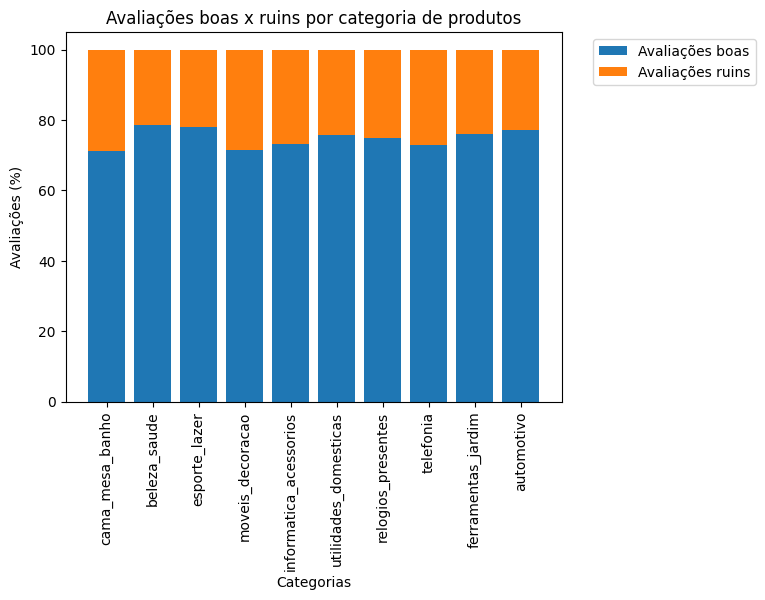

In [48]:
# Visualização da distribuição de notas por gráfico

good_scores = [valor[0] for valor in dict.values()]
bad_scores = [valor[1] for valor in dict.values()]

plt.bar(dict.keys(), good_scores, label='Avaliações boas')
plt.bar(dict.keys(), bad_scores, bottom=good_scores, label='Avaliações ruins')  # Especifica o fundo como os valores de valores1

plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Categorias')
plt.ylabel('Avaliações (%)')
plt.title('Avaliações boas x ruins por categoria de produtos')
plt.xticks(rotation='vertical')

plt.show()
